### Data
This data was scraped from IMDb.<br>
Link to Dataset:<br> 
https://www.kaggle.com/datasets/danielgrijalvas/movies?datasetId=2745&sortBy=voteCount&language=Python

### Content
There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

* budget: the budget of a movie. Some movies don't have this, so it appears as 0<br>
* company: the production company<br>
country: country of origin<br>

* director: the director<br>

* genre: main genre of the movie<br>

* gross: revenue of the movie<br>

* name: name of the movie<br>

* rating: rating of the movie (R, PG, etc.)<br>

* released: release date (YYYY-MM-DD)<br>

* runtime: duration of the movie<br>

* score: IMDb user rating<br>

* votes: number of user votes<br>

* star: main actor/actress<br>

* writer: writer of the movie<br>

* year: year of release<br>

### Analysis Structure: 

1. Data Cleaning and Preparation;  
2. EDA;  
3. Movie trends by Countries, Rating and Genre;
4. Company Analysis; 
5. Correlation Analysis;
6. Regression Analysis. 

In [1]:
# Import all necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
#plt.style.use('ggplot')


%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (14,8) # Adjusts the configuration of the plots 

In [2]:
# Libraries for Linear Regression Analysis
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Metrics for model's evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# Customize plots for Jupyter Notebook
from jupyterthemes import jtplot
jtplot.style('onedork')

In [4]:
# Data reading
df = pd.read_csv('C:/Users/Levi9/Documents/Documents/01_Portfolio_projects/04_Python/movies.csv')

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
df.shape

(7668, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


### Data Cleaning

In [8]:
# Looking for any missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

For the missing values we can drop all NaN, but as we can see there are a lot of NaN in the budget column. So we can replace all missing data in columns budget by averege value.<br>
For the column gross, we're going to delete all rows wih missing values, cause gross is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us.

In [9]:
# Budget Missing Data
budget_mean = df['budget'].mean(axis=0)
df['budget'].replace(np.nan, budget_mean, inplace=True)

In [10]:
# Deleting Gross Missing Data
df.dropna(subset=['gross'], axis=0, inplace=True)

For all other variables we can drop NaN.

In [11]:
df = df.dropna()

In [12]:
df.shape

(7412, 15)

In [13]:
# Data types for all columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
# Data type changing
df['budget'] = df['budget'].astype('int64') # budget - float - to integer
df['gross'] = df['gross'].astype('int64') # gross - float - to integer

In [15]:
# Split data of countries in realeased column by using method .split and convert to the datetime64
df['released_date'] = pd.to_datetime(df['released'].str.split(r'(').str[0], infer_datetime_format=True)

In [16]:
# Now we have 3 columns: country, released_date and year, so we can delete column released
df.drop('released', axis=1, inplace=True)

#### Check Duplicates

In [17]:
df.duplicated().sum()

0

There are no duplicates in this dataset.

### How many films there are in the set per year?

In [18]:
movies_per_year = df.groupby('year', as_index=False)\
                    .agg({'name': 'count'})\
                    .rename(columns={'name': 'movies_count'})\
                    .sort_values(by=['year'])

In [19]:
movies_per_year.head()

,year,movies_count
0,1980,80
1,1981,103
2,1982,118
3,1983,127
4,1984,155


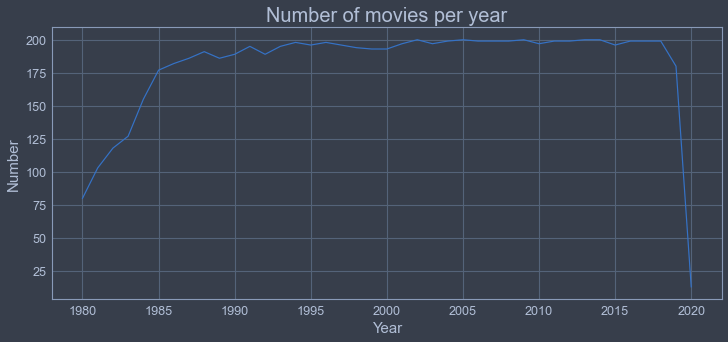

In [20]:
# Plot the movies per year
sns.lineplot(data=movies_per_year, x='year', y='movies_count')

plt.title('Number of movies per year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number', fontsize=15)

plt.gcf().set_size_inches(12, 5)

The dataset contains almost the same number of films released each year between 1985 and 2019.

### The oldest and newest movies in the set

In [21]:
# Oldest released movies
oldest_movies = df.sort_values(by=['released_date'])
oldest_movies[['name', 'released_date']][:10]

,name,released_date
74,Just Tell Me What You Want,1980-01-18
81,Windows,1980-01-18
29,American Gigolo,1980-02-01
65,Fatso,1980-02-01
18,The Fog,1980-02-08
69,Hero at Large,1980-02-08
20,Cruising,1980-02-15
39,Coal Miner's Daughter,1980-03-07
83,The King and the Mockingbird,1980-03-19
76,Little Miss Marker,1980-03-21


In [22]:
# Newest released movies
newest_movies = df.sort_values(by=['released_date'], ascending=False)
newest_movies[['name', 'released_date']][:10]

,name,released_date
7644,Wonder Woman 1984,2020-12-25
7643,Tenet,2020-09-03
7652,The Eight Hundred,2020-08-28
7580,Run with the Hunted,2020-06-26
7656,Tulsa,2020-06-03
7604,Mine 9,2020-05-19
7653,The Quarry,2020-04-17
7647,Onward,2020-03-06
7659,I Am Fear,2020-03-03
7646,The Invisible Man,2020-02-28


### Runtime and score distribution

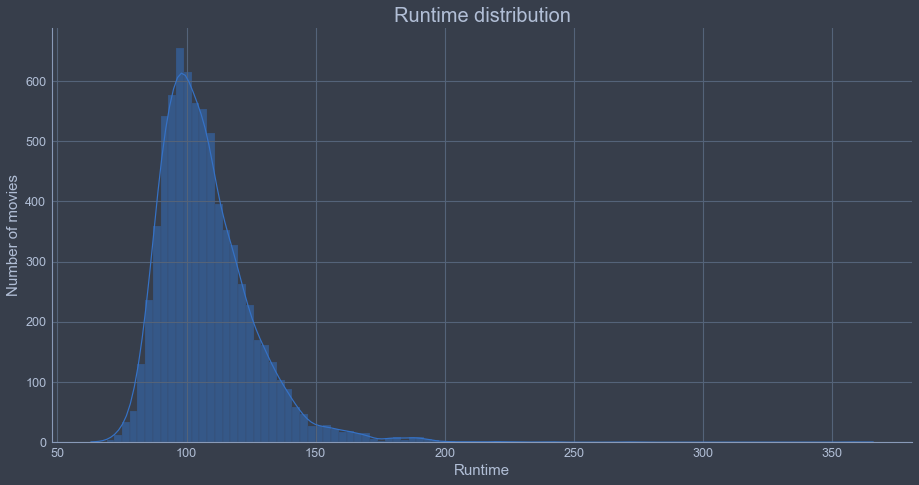

In [23]:
# Plot the distribution of the variable runtime
sns.displot(data=df, x='runtime',kde=True, binwidth=3, line_kws={'color': 'black'})

plt.title('Runtime distribution', fontsize=20)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Number of movies', fontsize=15)

plt.gcf().set_size_inches(15, 7)

<AxesSubplot:>

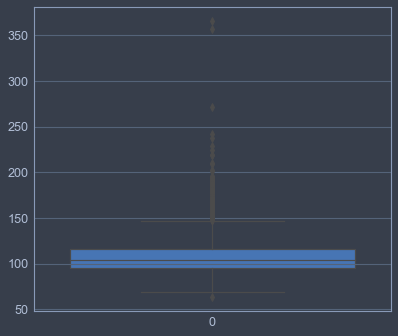

In [24]:
sns.boxplot(df['runtime'])

In [25]:
df['runtime'].describe()

count    7412.000000
mean      107.446438
std        18.517471
min        63.000000
25%        95.000000
50%       104.000000
75%       116.000000
max       366.000000
Name: runtime, dtype: float64

Runtime almost follows a normal distribution around 100 min of duration, but has little skewness to the left.<br>
Add - 25 and 75%

In [26]:
# Check the film with the maximum duration
df[df['runtime'] == 366]

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
4396,The Best of Youth,R,Drama,2003,8.5,21000.0,Marco Tullio Giordana,Sandro Petraglia,Luigi Lo Cascio,Italy,35589876,2799773,BiBi Film,366.0,2003-06-20


### Score distribution

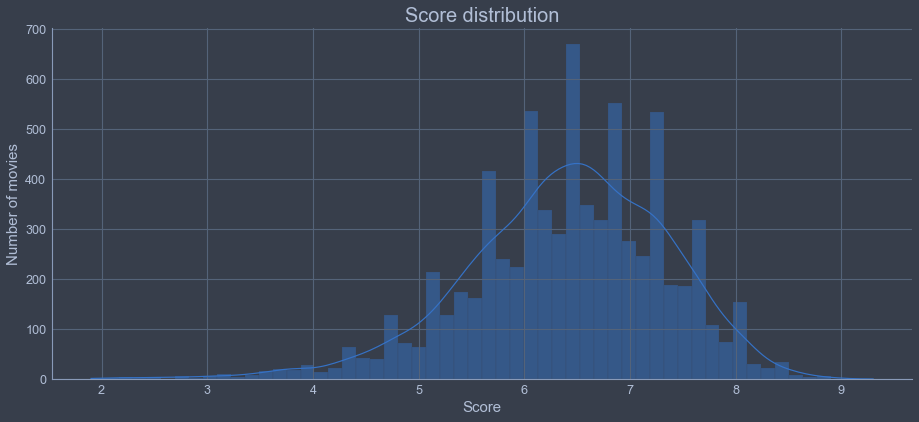

In [27]:
# Plot the distribution of scores
sns.displot(data=df, x='score', kde=True)

plt.title('Score distribution', fontsize=20)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Number of movies', fontsize=15)

plt.gcf().set_size_inches(15, 6)

<AxesSubplot:>

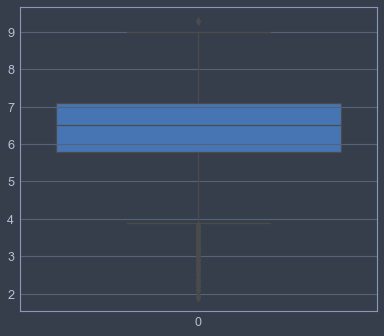

In [28]:
sns.boxplot(df['score'])

In [29]:
df['score'].describe()

count    7412.000000
mean        6.396910
std         0.963162
min         1.900000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: score, dtype: float64

Score values follow a normal distribution, around 6.4.

###  10 countries with most released films

In [30]:
movies_per_country = df['country'].value_counts().to_frame().reset_index()\
             .rename(columns={'index': 'country', 'country': 'movies_released'}).head(10)

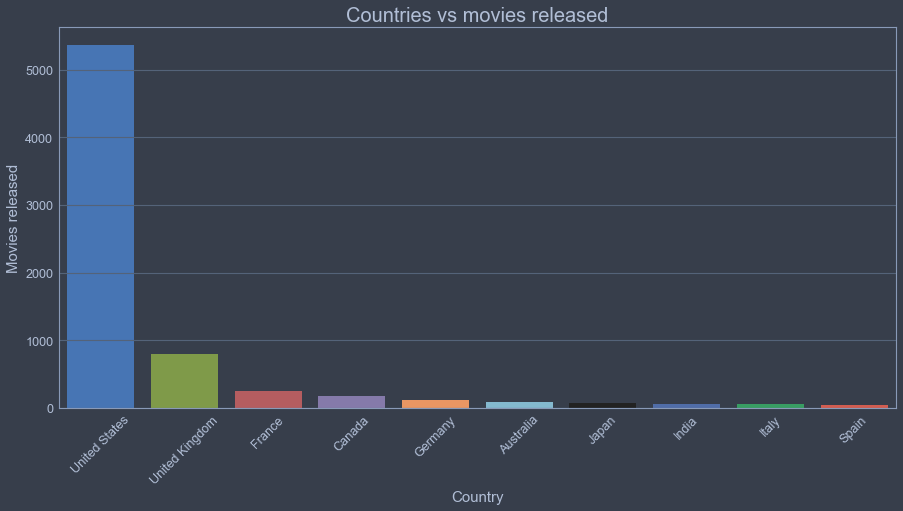

In [31]:
# Plot 10 countries with most released movies
sns.barplot(data=movies_per_country, x='country', y='movies_released')

plt.title('Countries vs movies released', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Movies released', fontsize = 15)

plt.gcf().set_size_inches(15, 7)
plt.xticks(rotation = '45');

In [32]:
# Checking the part of each country's contribution in film production
round(df['country'].value_counts(normalize=True)[:10], 2)

United States     0.72
United Kingdom    0.11
France            0.03
Canada            0.02
Germany           0.02
Australia         0.01
Japan             0.01
India             0.01
Italy             0.01
Spain             0.01
Name: country, dtype: float64

83%  of the movies were released in two countries: US (72%) and UK (11%). France, Canada and Germany release 7% of movies, while the rest of the countries in our top 10 have only 1% of the total number of movies in our dataset.

### Rating Comparison

In [33]:
df['rating'].value_counts()

R            3608
PG-13        2089
PG           1220
Not Rated     258
G             152
Unrated        45
NC-17          23
TV-MA           9
X               3
TV-PG           3
Approved        1
TV-14           1
Name: rating, dtype: int64

It looks like there is a category in the dataset with no rating assigned, however it is divided into two groups with different names: Not Rated & Unrated.<br>
We're going to change  Not Rated title into Unrated. 

In [34]:
df['rating'] = df['rating'].replace('Not Rated', 'Unrated')

In [35]:
# Create a new table of ratings and a column contains percentage of each rating

rating = df.groupby('rating', as_index=False).agg({'name': 'count'})\
.rename(columns={'name': 'movie_number'})\
.sort_values(by=['movie_number'], ascending=False)

rating['percent'] = round((rating['movie_number'] / rating['movie_number'].sum()) * 100, 2)
rating

,rating,movie_number,percent
5,R,3608,48.68
4,PG-13,2089,28.18
3,PG,1220,16.46
9,Unrated,303,4.09
1,G,152,2.05
2,NC-17,23,0.31
7,TV-MA,9,0.12
8,TV-PG,3,0.04
10,X,3,0.04
0,Approved,1,0.01


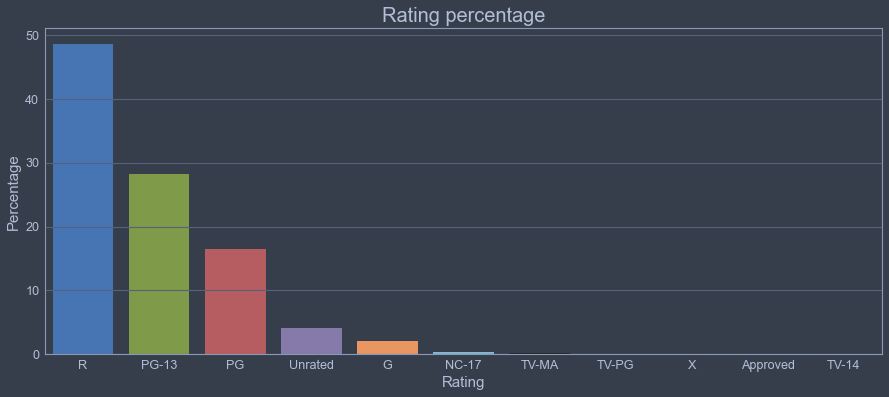

In [36]:
# Plot the percentage of each rating in the dataset
sns.barplot(data=rating, x='rating', y='percent')

plt.title('Rating percentage', fontsize=20)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

plt.gcf().set_size_inches(15, 6)

The most popular rating is R what is unsuitable for minors. In this case, content is not suitable for under 17 years of age. About 93% of movies belong to three ratings: R(48.68%), PG-13(28.18%), PG(16.46%).

### Genre Comparison

Let's check Top 10 the most released genres.

In [37]:
# Create a new table of genres and a column contains percentage of each genre
genres = df.groupby('genre', as_index=False)\
           .agg({'name': 'count'})\
           .rename(columns={'name': 'movie_number'})

genres['percent'] = round((genres['movie_number'] / genres['movie_number'].sum()) * 100, 2)
genres = genres.sort_values(by=['percent'], ascending=False)[:10]

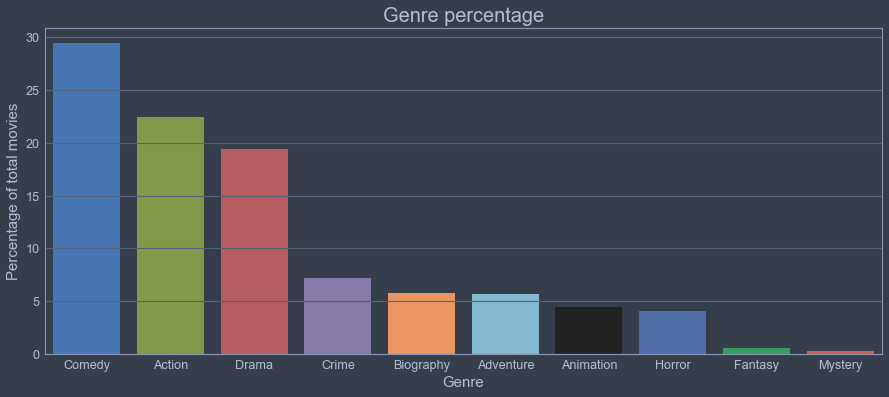

In [84]:
# Plot the percentage of each genre in the dataset
sns.barplot(data=genres, x='genre', y='percent')

plt.gcf().set_size_inches(15, 6)

plt.title('Genre percentage', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Percentage of total movies', fontsize=15);

The most popular genre is Comedy (29,44% of all movies released). In addition, we can add two another genres forming the top 3 genres, which make up 71% of all released films: Action (22.38%) and Drama (19.49%).

In [39]:
round((df['genre'].value_counts(normalize=True)) * 100, 2)[:10]

Comedy       29.44
Action       22.48
Drama        19.41
Crime         7.23
Biography     5.79
Adventure     5.65
Animation     4.47
Horror        4.10
Fantasy       0.57
Mystery       0.27
Name: genre, dtype: float64

In [40]:
df['runtime'].mean()

107.44643820831085

#### Conclusion
* The studied time lapse goes from 1980 to 2020.
* The average film duration is 2 h.
* Highest counts for rating is R rated.
* Highest counts for genre is Comedy

### Company Analysis

#### Top 10 Companies with the most movie releases

In [41]:
# Verifying the unique companies
df['company'].nunique()

2242

There are 2242 different companies in this dataset.<br>
Let's see top 10 companies with the most releases. 

In [42]:
company_release = df['company'].value_counts()\
                               .to_frame().reset_index()\
                               .rename(columns={'index': 'company', 'company': 'movie_releases'})\
                               .head(10)
company_release

,company,movie_releases
0,Universal Pictures,376
1,Warner Bros.,332
2,Columbia Pictures,332
3,Paramount Pictures,319
4,Twentieth Century Fox,240
5,New Line Cinema,173
6,Touchstone Pictures,132
7,Walt Disney Pictures,123
8,Metro-Goldwyn-Mayer (MGM),123
9,TriStar Pictures,94


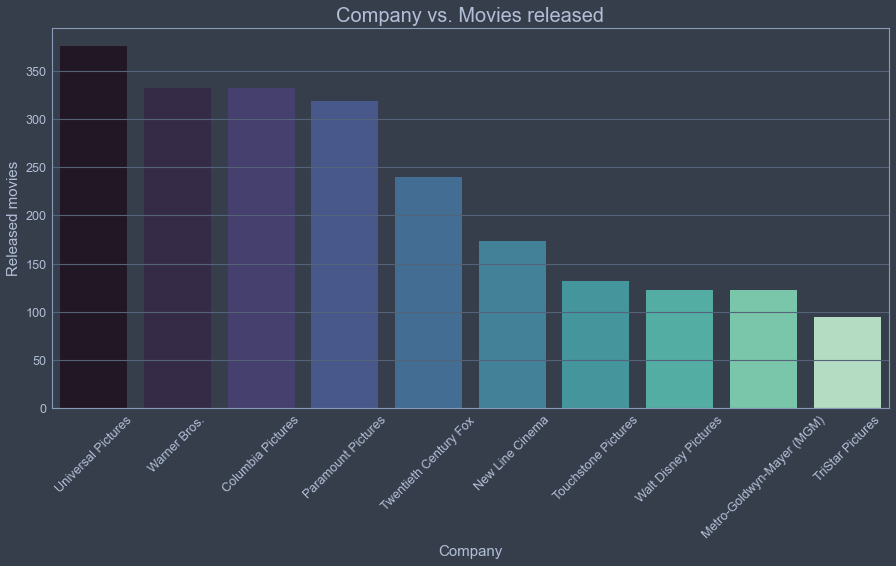

In [43]:
# Plot movies released by companies
sns.barplot(data=company_release,
            x='company',
            y='movie_releases',
            palette='mako')

plt.title('Company vs. Movies released', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Released movies', fontsize=15)

plt.gcf().set_size_inches(15, 7)
plt.xticks(rotation='45');

In [44]:
# we can calculate what percentage of films produced by the top 10 companies
round(company_release['movie_releases'].sum() / df.company.count() * 100, 2)

30.28

The 10 biggest companies around the world concentrate nearly 30% of all the movies released.

#### Comparing Top 10 Companies by Budget and Gross

In [45]:
# Creating a new dataframe for the company's budget and gross sum and sorting them
company_gross_budget = df.groupby('company')[['budget', 'gross']].agg({'budget': 'sum', 'gross': 'sum'})\
.reset_index().sort_values(by=['gross'], ascending=False).head(10)
company_gross_budget

,company,budget,gross
2179,Warner Bros.,20713355784,56329179122
2142,Universal Pictures,17626864297,52514188890
686,Columbia Pictures,16579803280,43008941346
1697,Paramount Pictures,15147045040,40493607415
2115,Twentieth Century Fox,12577886156,40257053857
2176,Walt Disney Pictures,10974138016,36327887792
1606,New Line Cinema,6285817768,19867862616
1508,Marvel Studios,2664000000,15065592411
833,DreamWorks Animation,3344000000,11873612858
2095,Touchstone Pictures,5114626652,11795832638


Let's convert budget's numbers into float (billions of dollars) which is more readeble.

In [46]:
company_gross_budget['budget_dollar'] = round(company_gross_budget['budget'].astype(float) / 1000000000, 2)
company_gross_budget['gross_dollar'] = round(company_gross_budget['gross'].astype(float) / 1000000000, 2)

In [47]:
# Drop old columns
company_gross_budget.drop(['budget', 'gross'], axis=1, inplace=True)
# Rename new columns
company_gross_budget.rename(columns={'budget_dollar': 'budget', 'gross_dollar': 'gross'}, inplace=True)

company_gross_budget

,company,budget,gross
2179,Warner Bros.,20.71,56.33
2142,Universal Pictures,17.63,52.51
686,Columbia Pictures,16.58,43.01
1697,Paramount Pictures,15.15,40.49
2115,Twentieth Century Fox,12.58,40.26
2176,Walt Disney Pictures,10.97,36.33
1606,New Line Cinema,6.29,19.87
1508,Marvel Studios,2.66,15.07
833,DreamWorks Animation,3.34,11.87
2095,Touchstone Pictures,5.11,11.80


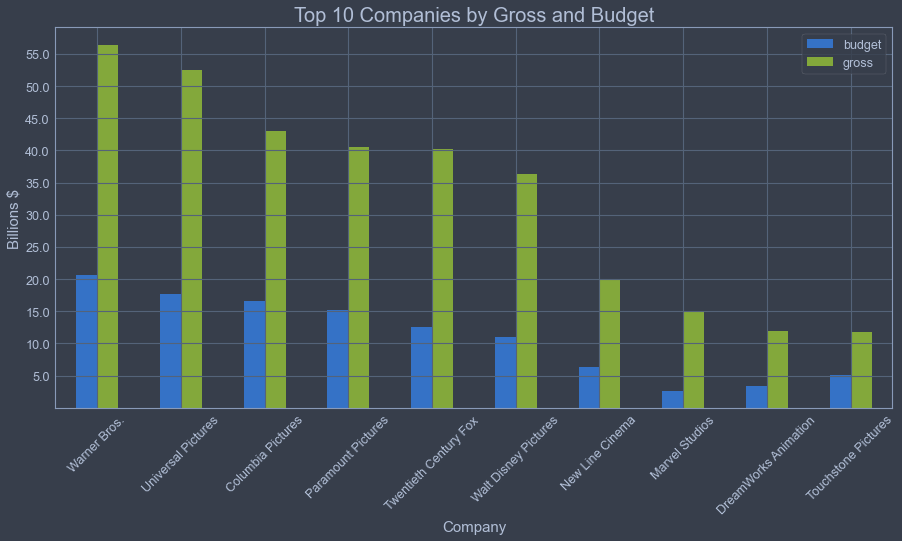

In [48]:
# Plot the Top 10 Companies by Gross and Budget

ax = company_gross_budget.plot.bar(x='company', rot=0)

plt.gcf().set_size_inches(15, 7)
plt.xticks(rotation='45')

plt.title('Top 10 Companies by Gross and Budget', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Billions $', fontsize=15);

# Changing the values of the axis so it can be readable to the audiance

plt.yticks(range(5, 60, 5))
vals = ax.get_yticks()

# Changing the format of the valuesin the y-axis

ax.set_yticklabels(['{:,.1f}'.format(x) for x in vals]);

This plot shows the budget and gross for each company and demonstrates how huge companies earned from there movies.<br>  
<p>Comparing two plots 'Company vs. Movies released' and 'Top 10 Companies by Gross and Budget', we can take notice of Warner Bros. that has the highest gross but the company released less movies than Columbia Pictures and Universal Pictures. So we can suppose that Warner Bros. has more successful movies than Columbia Pictures and Universal Pictures.</p> 

### Correlation Analysis
It can be assumed there is a correlation between budget and gross.

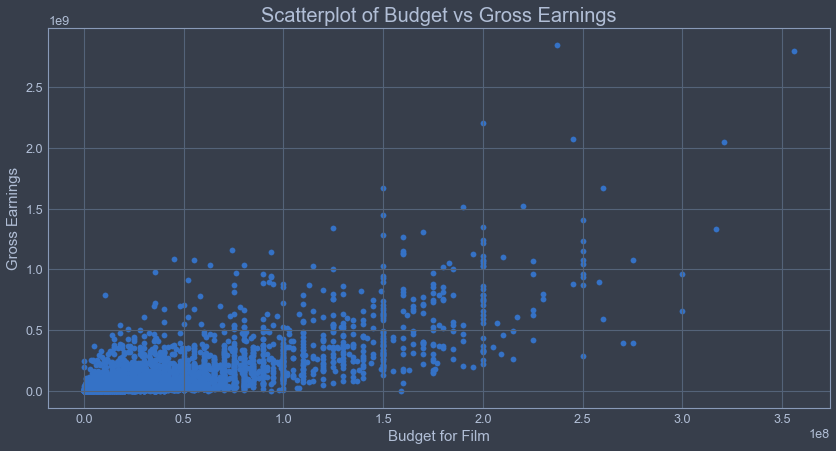

In [49]:
# Scatter plot with budhet vs gross
plt.figure(figsize=(14,7))

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Scatterplot of Budget vs Gross Earnings', fontsize=20)
plt.xlabel('Budget for Film', fontsize=15)
plt.ylabel('Gross Earnings', fontsize=15)
plt.show()

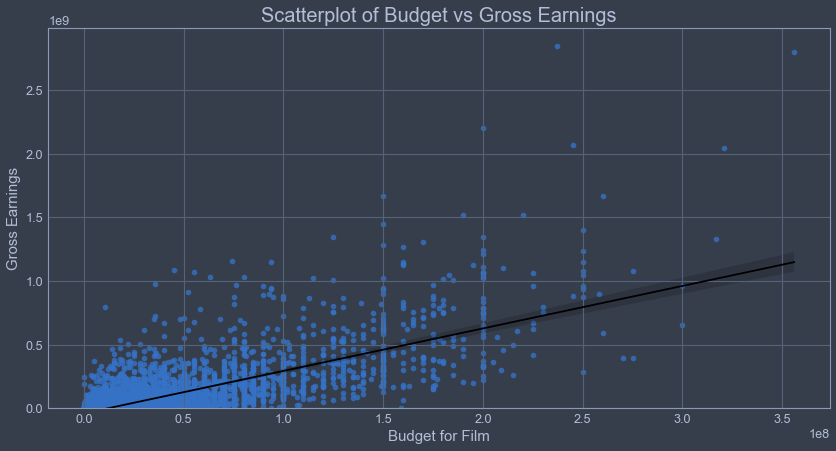

In [50]:
# Plot budget vs Gross
plt.figure(figsize=(14,7))
sns.regplot(data=df, x='budget', y='gross', line_kws={'color': 'black'})
plt.ylim(0,)

plt.title('Scatterplot of Budget vs Gross Earnings', fontsize=20)
plt.xlabel('Budget for Film', fontsize=15)
plt.ylabel('Gross Earnings', fontsize=15);

In [51]:
# Exact value of correlation - high correlation between budget and gross
df['gross'].corr(df['budget'])

0.7146066446112197

In [52]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.093951,0.218941,0.268662,0.258826,0.114237
score,0.093951,1.000000,0.415190,0.061506,0.188071,0.397226
votes,0.218941,0.415190,1.000000,0.420611,0.631110,0.309945
budget,0.268662,0.061506,0.420611,1.000000,0.714607,0.266956
gross,0.258826,0.188071,0.631110,0.714607,1.000000,0.245117
runtime,0.114237,0.397226,0.309945,0.266956,0.245117,1.000000


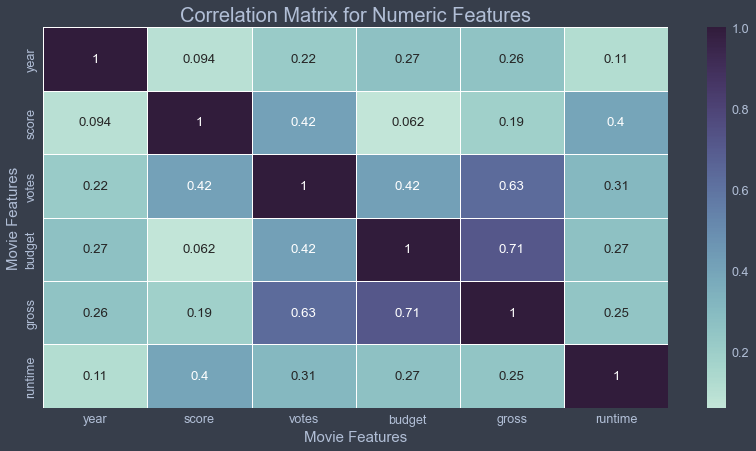

In [53]:
# Create a correlation matrix for all numeric variables
correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix,
            annot=True,
            linewidth=.5,
            cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))

plt.title('Correlation Matrix for Numeric Features', fontsize=20)
plt.xlabel('Movie Features', fontsize=15)
plt.ylabel('Movie Features', fontsize=15);

In [54]:
# We can create numeric representation for all variables 
# what is make possible to check a correlation  between them
df_numerized = df.copy()

In [55]:
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [56]:
df_numerized.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
0,6372,5,6,1980,8.4,927000.0,2471,3851,979,52,19000000,46998772,2179,146.0,1980-06-13
1,5373,5,1,1980,5.8,65000.0,2169,1564,306,53,4500000,58853106,686,104.0,1980-07-02
2,4956,3,0,1980,8.7,1200000.0,1063,2464,1642,53,18000000,538375067,1446,124.0,1980-06-20
3,277,3,4,1980,7.7,221000.0,1248,1920,2112,53,3500000,83453539,1697,88.0,1980-07-02
4,993,5,4,1980,7.3,108000.0,1010,499,387,53,6000000,39846344,1665,98.0,1980-07-25


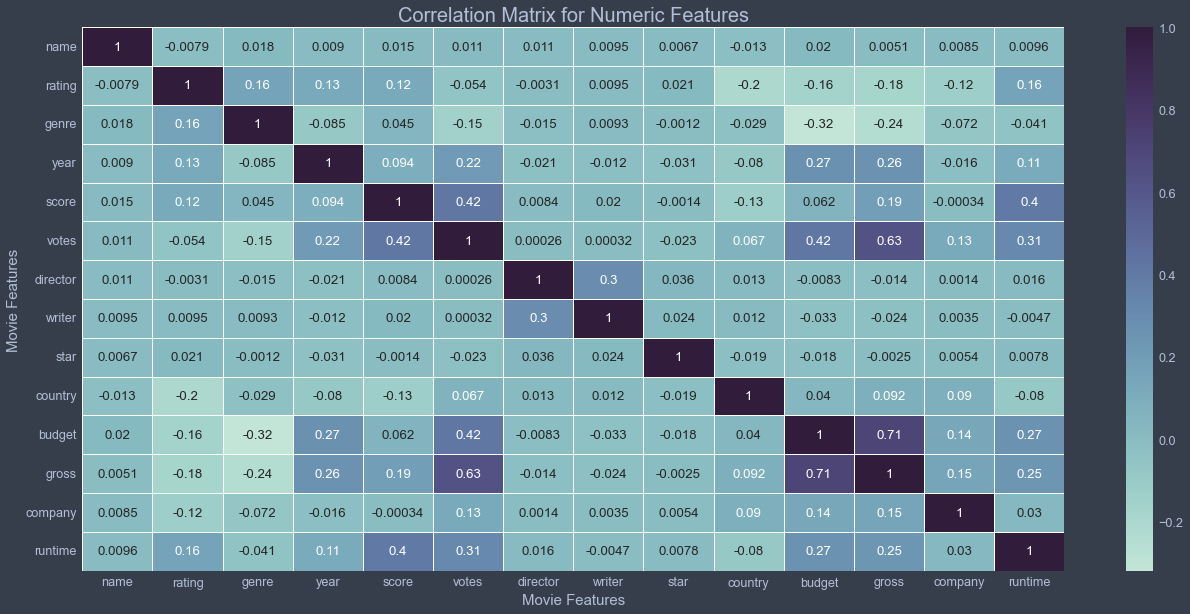

In [57]:
# Create a correlation matrix for all numerized variables
correlation_matrix = df_numerized.corr(method='pearson')

plt.figure(figsize=(22, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            linewidth=.5,
            cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))

plt.title('Correlation Matrix for Numeric Features', fontsize=20)
plt.xlabel('Movie Features', fontsize=15)
plt.ylabel('Movie Features', fontsize=15);

In [58]:
# Finding the highest correlation
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)

In [59]:
# Choose variables with correlation less than 1 and more than +/-0.3
high_correlation = sorted_pairs[((sorted_pairs > 0.3) & (sorted_pairs < 1)) |
                                ((sorted_pairs > -0.3) &
                                 (sorted_pairs < -1))]

In [60]:
# Check top correlated variables
high_correlation.head(20)

budget   gross      0.714607
gross    budget     0.714607
         votes      0.631110
votes    gross      0.631110
budget   votes      0.420611
votes    budget     0.420611
score    votes      0.415190
votes    score      0.415190
score    runtime    0.397226
runtime  score      0.397226
votes    runtime    0.309945
runtime  votes      0.309945
dtype: float64

#### Conclusions
<p>Through this analysis, we can clearly see that variables like company, director, star, and country where a movie is released have no correlation with the actual revenue. Whereas budget and votes for a movie have greater impact in the gross.</p>

<p>Low budget movies and low voted movies all seem to have poor gross.<br>
As the budget raises, there is an exponencial tendency for gross improvement.</p>

### Regression Analysis

#### Multiple Linear Regression Model

<p>The goal of this section is to build a model that, given certain features (independent variables), could predict the gross revenue of a movie (dependent variable). For that, I will:</p>

1. Select the features to be used in the model
2. Split between training and test sets
3. Scale numerical variables
4. Evaluate the model and predict on test and sample data

The features I am going to use are those that have shown some correlation to the gross revenue, either negative or positive

In [61]:
# Choose the features
feat = df[df.columns[::]].corr()['gross']\
       .to_frame().reset_index()\
       .rename(columns={'index': 'variable', 
                         'gross': 'correlation'})\
       .sort_values(by='correlation', ascending=False)
feat

,variable,correlation
4,gross,1.000000
3,budget,0.714607
2,votes,0.631110
0,year,0.258826
5,runtime,0.245117
1,score,0.188071


In [62]:
# Let's exclude the 'gross', which is correlated to itself
feat = feat.iloc[1:]
feat

,variable,correlation
3,budget,0.714607
2,votes,0.631110
0,year,0.258826
5,runtime,0.245117
1,score,0.188071


For linear prediction several features will be used: budget, votes, year, runtime and score.

In [63]:
# Split the dataset
X = df[['budget', 'votes', 'year', 'runtime', 'score']]
y = df.gross

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [64]:
# Scale the predictors
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [65]:
# Building the model
lm = LinearRegression()

In [66]:
lm.fit(X_train, y_train)
prediction = lm.predict(X_test)

In [67]:
# Main metrics for evaluation the quality of a model’s predictions
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r_sqrt = round(r2_score(y_test, prediction) * 100, 2)

print('MAE: {}\nMSE: {}\nRMSE: {}\nR-squared: {}'.format(mae, mse, rmse, r_sqrt))

MAE: 57916828.83632764
MSE: 1.182080512195144e+16
RMSE: 108723526.07394335
R-squared: 66.53


Let's look at the distribution plot of the fitted values that result from the model and compare it to the distribution of the actual values.

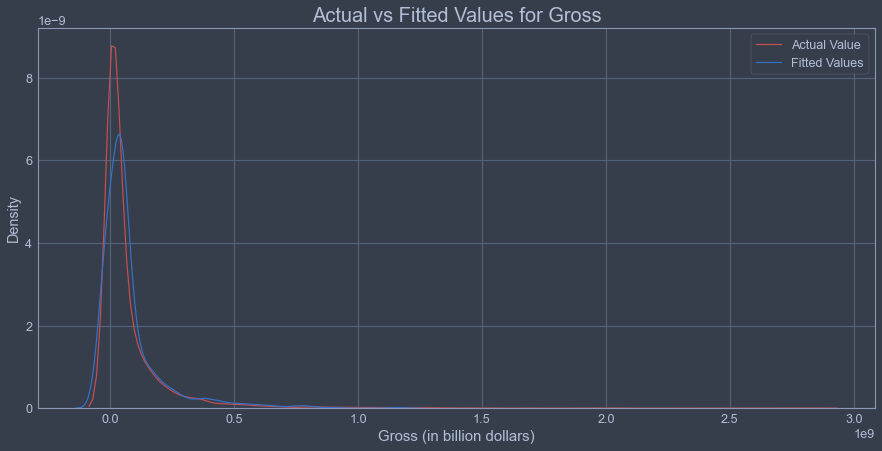

In [68]:
ax1 = sns.kdeplot(y_train, color='r', label='Actual Value')
sns.kdeplot(prediction, color='b', label='Fitted Values', ax=ax1)

# Add labels
ax1.legend(loc='upper right')

# Plot's size
plt.gcf().set_size_inches(15, 7)

# Titles
plt.title('Actual vs Fitted Values for Gross', fontsize=20)
plt.xlabel('Gross (in billion dollars)',  fontsize=15);


With only these features, the model can already explain roughly 66,5% of the variability of the data.

In [69]:
# Coefficents of the linear model
coeff = pd.DataFrame(lm.coef_, columns={'Coefficients'}, index=X.columns)
coeff

,Coefficients
budget,8.457325e+07
votes,6.116854e+07
year,4.434973e+06
runtime,-5.725076e+06
score,2.707129e+05


#### Polynomial Regression

<p>Let's plot all features, just to get a visualized understanding of the relationships between the features and the target variable.</p>

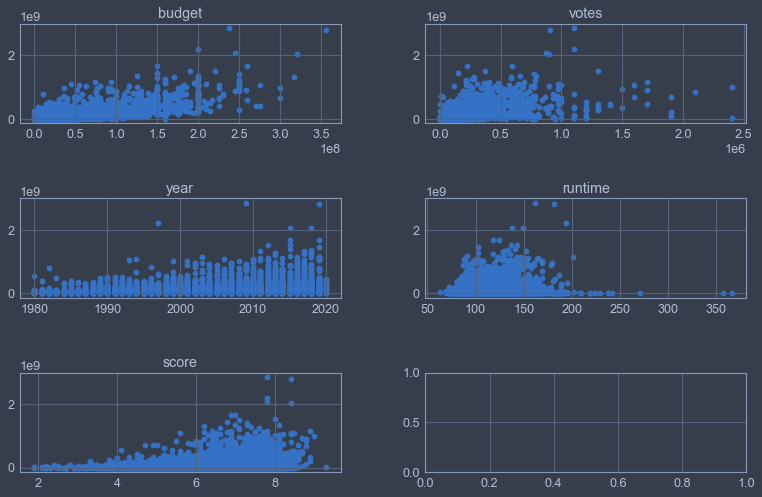

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.tight_layout(pad=4.0) # set the spacing between subplots

axes[0, 0].scatter(df.budget, df.gross)
axes[0, 0].set_title('budget')

axes[0, 1].scatter(df.votes, df.gross)
axes[0, 1].set_title('votes')

axes[1, 0].scatter(df.year, df.gross)
axes[1, 0].set_title('year')

axes[1, 1].scatter(df.runtime, df.gross)
axes[1, 1].set_title('runtime')

axes[2, 0].scatter(df.score, df.gross)
axes[2, 0].set_title('score');

<p>As we can see from the plots above, the relationship between some the independent variables x and dependent variable y is not quite linear.</p>

In this case we can try to use the Polynomial Regression. Let's see how the R-squared changes on the test data for different order polynomials and then plot the results:

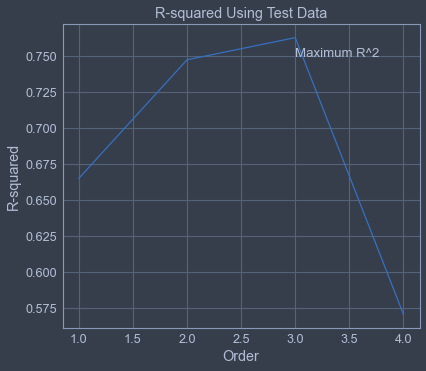

In [83]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(X_train)
    
    x_test_pr = pr.fit_transform(X_test)    
    
    lm.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lm.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('Order')
plt.ylabel('R-squared')
plt.title('R-squared Using Test Data')
plt.text(3, 0.75, 'Maximum R^2');

Based on the results of the plot *R^2 Using Test Data*, we can notice that we get the **Maximum R-squared** using the polynom with degree=3.

In [72]:
# Creating a polynomial object
pf = PolynomialFeatures(degree=3)

# Data transforming
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.fit_transform(X_test)

In [73]:
# Fit the model and get predictions
lm.fit(X_train_pf, y_train)
prediction_pf = lm.predict(X_test_pf)

R-squared of the training data:

In [74]:
lm.score(X_train_pf, y_train)

0.7641858465761016

R-squared of the test data:

In [75]:
lm.score(X_test_pf, y_test)

0.7630026266791565

In [76]:
# Main metrics for evaluation the quality of a model’s predictions
mae_pf = mean_absolute_error(y_test, prediction_pf)
mse_pf = mean_squared_error(y_test, prediction_pf)
rmse_pf = np.sqrt(mse)
r_sqrt_pf = round(r2_score(y_test, prediction_pf) * 100, 2)

print('MAE: {}\nMSE: {}\nRMSE: {}\nR-squared: {}'.format(mae_pf, mse_pf, rmse_pf, r_sqrt_pf))

MAE: 43408547.91264782
MSE: 8369463480212975.0
RMSE: 108723526.07394335
R-squared: 76.3


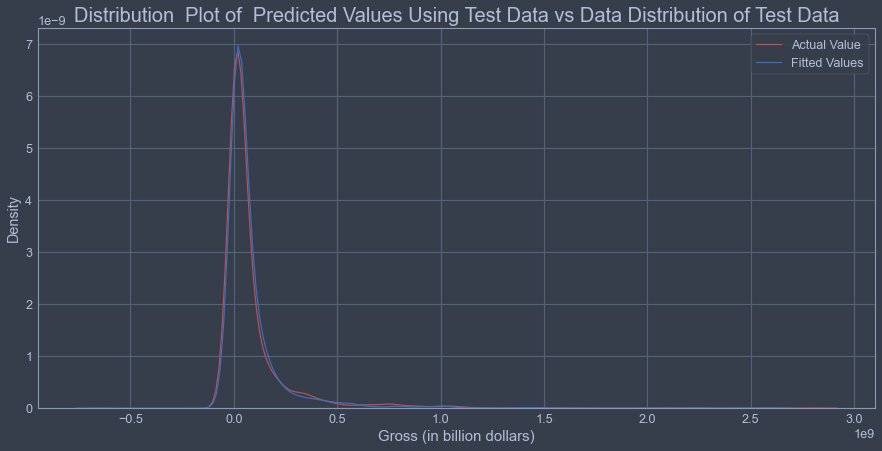

In [77]:
# Plot the actual and fitted values with Polynomial Regression
ax1 = sns.kdeplot(y_test, color='r', label='Actual Value')
sns.kdeplot(prediction_pf, color='b', label='Fitted Values', ax=ax1)

# Add labels
ax1.legend(loc='upper right')

# Plot's size
plt.gcf().set_size_inches(15, 7)

# Titles
plt.title(
    'Distribution  Plot of  Predicted Values Using Test Data vs Data Distribution of Test Data',
    fontsize=20)
plt.xlabel('Gross (in billion dollars)', fontsize=15);

### Ridge Regression

There are cases of multicolinearity, so I'll try Ridge Regression and see how the parameter alpha changes the model.

I select the different values of alpha for checking what happens with the test error. To do so, we can use a for loop. A progress bar was also created to see how many iterations we have completed so far.

In [78]:
from tqdm import tqdm

In [79]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0, 10))
pbar = tqdm(Alpha)

for alpha in pbar:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_pf, y_train)
    
    test_score, train_score = ridge_model.score(
        X_test_pf, y_test), ridge_model.score(X_train_pf, y_train)
    
    pbar.set_postfix({'Test Score': test_score, 'Train Score': train_score})
    
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 110.01it/s, Test Score=0.755, Train Score=0.76]


Let's plot out the value of R-squared for different alphas:

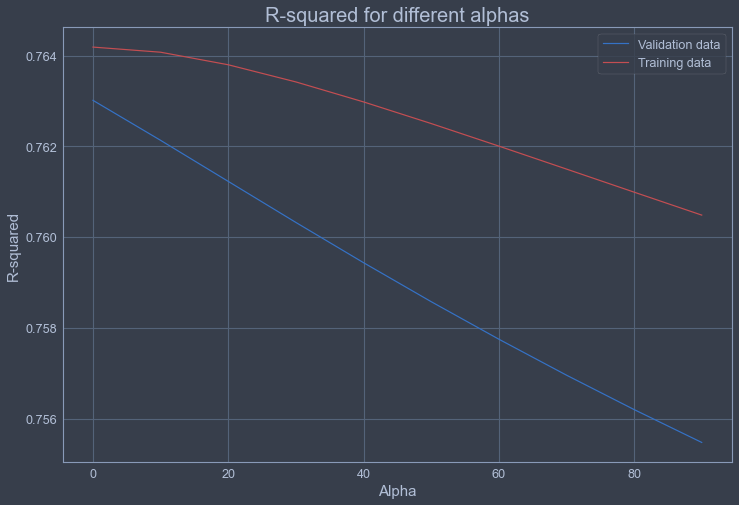

In [80]:
width = 12
height = 8
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label='Validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='Training data')
plt.title('R-squared for different alphas', fontsize=20)
plt.xlabel('Alpha', fontsize=15)
plt.ylabel('R-squared', fontsize=15)
plt.legend();

<p>As we can see from the lot above, as the alpha hyperparameter increases, the coefficient of determination decreases. Thus, we can summarize that the Ridge Regression is not suitable for this dataset, since it does not need dimension reduction, as it doesn't have an excessive number of predictors.</p>

<p>Let's create a table with main metrics for evaluation the quality of a model’s predictions to be able to compare the performance of our models.</p>

In [81]:
comparative_metrics_table = pd.DataFrame(
    {'multiple_linear_regression':[mae, mse, rmse, r_sqrt],
     'polynomial_regression': [mae_pf, mse_pf, rmse_pf, r_sqrt_pf]}, 
     index=['MAE', 'MSE', 'RMSE', 'R-squared'])

# Styling the output of a dataframe to get rid of scientific notation 
comparative_metrics_table = comparative_metrics_table.style.format("{:.2f}")

comparative_metrics_table

,multiple_linear_regression,polynomial_regression
MAE,57916828.84,43408547.91
MSE,11820805121951440.00,8369463480212975.00
RMSE,108723526.07,108723526.07
R-squared,66.53,76.30


#### Conclusion
<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, so we can determine a better model fit.</p>
<p>When comparing models, the model with the higher R-squared value is a better fit for the data. So the second Polynomial model with degree=3 shows higher R-squared value than the Multiple Linear model. </p>
<p>At the same time, When comparing models, the model with the smallest MSE value (also Polynomial) is a better fit for the data.</p>
<p>Thus, using the polynomial model, we were able to increase the explanation of the variability of the data on 10%.</p>